In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
#Загрузка учебного датасета
df = pd.read_csv("S02-hw-dataset.csv")

In [ ]:
#Вывод данных для первичного анализа
print(df.head())
print(df.info())
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [13]:
print(df.isna().mean()) #доля пропусков
print(f"Кол-во дубликатов: {df.duplicated().sum()}") #кол-во дубликатов
print(df[(df["age"]<0) | (df["age"]>100)]) #Подозрительные значения



user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Кол-во дубликатов: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


## Проблемы качества данных

1. **Пропуски:** В столбце `age` найден 1 пропуск, что составляет около 4.8% всех данных.
2. **Дубликаты:** В данных есть 1 дублирующаяся строка с возрастом `120.0` и отрицательным значением в столбце `purchases` (-1), что требует дальнейшей обработки.
3. **Подозрительные значения:**
   - Возраст `120` в столбце `age` является аномалией и должен быть обработан.
   - В столбце `purchases` отрицательные значения также присутствуют, что является ошибкой.



#Базовый EDA: группировки, агрегаты и частоты

In [25]:
print(df['country'].value_counts())
print(df.groupby('country')['purchases'].mean())
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
print(df.groupby('age_group', observed=False)['purchases'].mean())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64
age_group
0-18      6.000000
19-35     4.952381
36-50     4.222222
51-100    5.000000
Name: purchases, dtype: float64


## Основные наблюдения

1. **Доминирующие категории:** Наибольшее количество пользователей приходится на Россию (RU) — 13 записей, затем идет Франция (FR) с 12 записями.
2. **Средние значения:** Среднее количество покупок по странам варьируется от 4.5 до 6.5. Германия (DE) имеет наибольшее среднее значение (6.5), а Китай (CN) — самое низкое (4.5).
3. **Неожиданные эффекты:** В возрастных группах наибольшее среднее количество покупок наблюдается в группе 0-18 лет (6), что может быть необычным для такой возрастной категории.


#Визуализация данных в Matplotlib

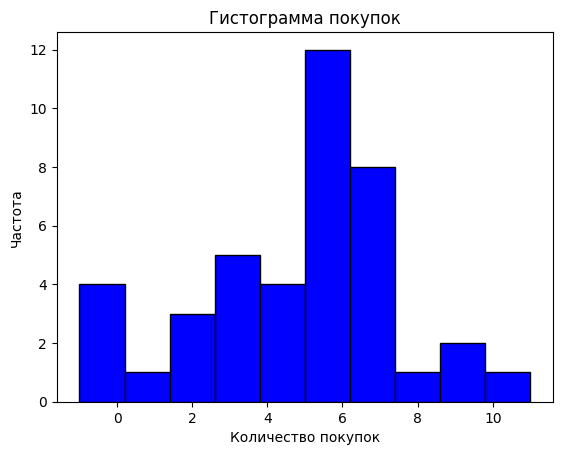

In [20]:
plt.hist(df['purchases'], bins=10, color='blue', edgecolor='black')
plt.title('Гистограмма покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
#сохранение графика в папку
output_dir= 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/purchases_histogram.png')
plt.show()

**Основные наблюдения:**
- Показывает распределение количества покупок.
- Мы видим, что большинство пользователей совершили от 0 до 10 покупок.

<Figure size 1000x600 with 0 Axes>

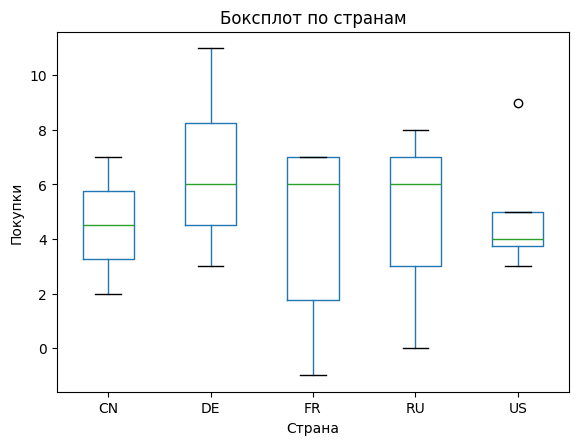

In [22]:
plt.figure(figsize=(10, 6))
df.boxplot(column='purchases', by='country', grid=False)
plt.title('Боксплот по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Покупки')
#Сохранение графика в папку
output_dir= 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/purchases_boxplot.png')
plt.show()

**Основные наблюдения:**
- Показывает распределение количества покупок в разных странах.
- Видно, что медианные значения схожи, но в некоторых странах присутствуют выбросы.

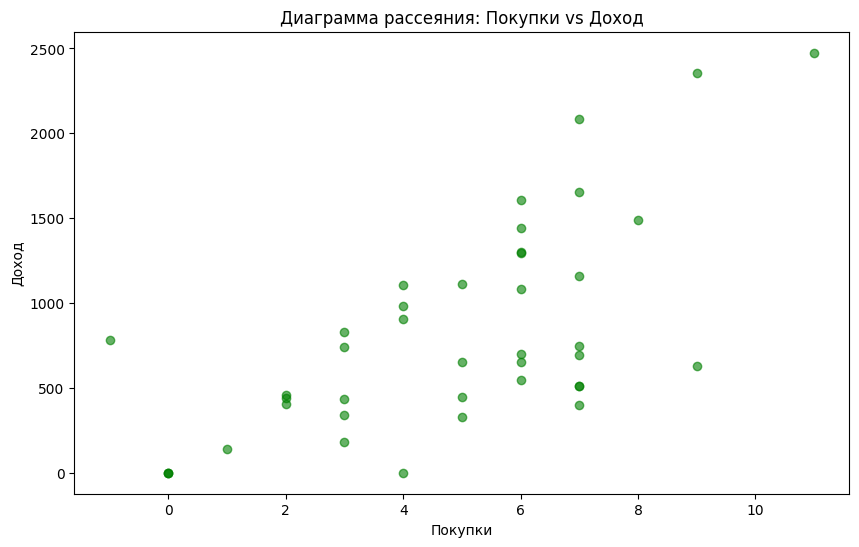

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['purchases'], df['revenue'], alpha=0.6, color='green')
plt.title('Диаграмма рассеяния: Покупки vs Доход')
plt.xlabel('Покупки')
plt.ylabel('Доход')
#Сохранение графика в папку
output_dir= 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/purchases_scatterplot.png')
plt.show()

**Основные наблюдения:**
- Показывает зависимость между количеством покупок и доходом.
- Наблюдается положительная связь: чем больше покупок, тем выше доход.
- Есть несколько точек-выбросов, которые выбиваются из общей тенденции.

## 📌 Заключение

- **Качество данных:** Обнаружены пропуски, один дубликат и несколько аномальных значений (возраст 120 лет, отрицательные покупки). Эти записи требуют дальнейшей очистки.

- **Групповой анализ:** Среднее количество покупок заметно отличается между странами и возрастными группами. Наибольшая активность наблюдается среди более молодых пользователей.

- **Визуализация:** Гистограмма, боксплот и scatter plot показали распределение ключевых признаков и слабую положительную связь между количеством покупок и доходом.

В целом данные информативны и подходят для дальнейшего анализа, но нуждаются в небольшой предварительной обработке.
